# Feature Engineering

### Was sind diese Features?

Feature Engineering bezeichnet alle Techniken aus dem Bereich Machine Learning, die die Daten in eine für ML-Algorithmen günstige Form transformieren. Dabei werden unter Features (Eigenschaften) die verschiedenen Spalten eines Datensatzes verstanden, die ja im Grunde genau das sind: Eigenschaften der von Zeile zu Zeile festgehaltenen Entitäten.

| id | name               | age | sex | height | experience | department  | degree      | remote | salary |
|----|--------------------|-----|-----|--------|------------|-------------|-------------|--------|--------|
| 1  | Dora Datenfels     | 30  | f   | 171    | 7          | IT          | nan         | yes    | 51000  |
| 2  | John Smith         | 47  | m   | 182    | 21         | Sales       | Bachelor    | no     | 62000  |
| 3  | Andrea Müller      | nan | f   | 168    | 19         | HR          | Master      | yes    | 67500  |

So hat die Entität mit der ID 1 mehrere erfasste Eigenschaften, darunter ein Alter, Geschlecht und ein Gehalt. Und so für jede Zeile.

### Warum Engineering?
Machine-Learning-Algorithmen können meist nur mit numerischem Input umgehen. Darüber hinaus liefern viele Modelle deutlich bessere Ergebnisse, wenn die Eingabedaten vorab in eine geeignete Form transformiert wurden. Genau hier setzt Feature Engineering an: Es bezeichnet den gezielten Umgang mit Rohdaten, um daraus optimale Eingabemerkmale für Lernalgorithmen zu machen.

Klassische Techniken des Feature Engineering sind:

* Ersetzen fehlender Werte (Imputation), z.B. durch Mittelwert, Median oder Modell-basierte Verfahren (etwa beim Alter)

* Einheitliche Skalierung von Features mit unterschiedlicher Streuung (z.B. Standardisierung oder Min-Max-Skalierung von z.B. Körpergröße und Erfahrung)


* Kodierung nominaler Merkmale mittels Dummy-Variablen (z.B. One-Hot-Encoding von Geschlecht mit 0 und 1)

* Kodierung ordinaler Merkmale durch aufsteigende Ganzzahlen, entsprechend ihrer natürlichen Rangfolge (z.B.: High School = 1, Bachelor = 2, Master = 3, PhD = 4)

* Feature-Transformationen, z.B. durch Logarithmieren, Quadrieren oder Binning zur besseren Modellierbarkeit (bei linearen Modellen können so z.B. quadratische oder logarithmische Zusammenhänge "geradegebogen" werden)

* Generierung neuer Features, z.B. durch Kombination oder Interaktion bestehender Merkmale

* Outlier Detection: Entdeckung und Behandlung von Ausreißern

### Nach dem Engineering ist auch einiges zu tun

Nachdem die Daten so für das Modell vorbereitet wurden, spielen natürlich für die besten Ergebnisse die Wahl des passendsten Modells, Hyperparameter-Tuning sowie Feature Selection (nicht alle Variablen sollten auch genutzt werden!) eine wichtige Rolle.

In [84]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

In [85]:
# Starten mit unserem kleinen Übungsdatensatz:
employees = pd.read_csv('employee_data.csv', index_col='id')
employees

,name,age,sex,height,experience,department,degree,remote,salary
id,,,,,,,,,
1,John Smith,47.0,m,182,21.0,Sales,Bachelor,no,62000
2,Andrea Müller,NaN,f,168,19.0,HR,Master,yes,67500
3,Dora Datenfels,30.0,f,171,7.0,IT,Bachelor,yes,51000
4,Ben Krause,39.0,m,176,15.0,Marketing,High School,no,58000
5,Clara Sonnenschein,25.0,f,165,2.0,IT,Bachelor,yes,49500
6,Fatih Yilmaz,41.0,m,179,NaN,Finance,Master,no,72000
7,Emily Nguyen,34.0,f,160,10.0,HR,Bachelor,yes,56000
8,Markus Bold,52.0,m,185,27.0,Management,PhD,no,83000
9,Sophie Becker,28.0,f,170,4.0,Sales,High School,yes,50500


### Umgang mit fehlenden Werten

In [86]:
employees.isna().sum()

name          0
age           2
sex           0
height        0
experience    1
department    0
degree        0
remote        0
salary        0
dtype: int64

#### Droppen > Datenverlust

In [87]:
# Für den ganzen Datensatz alle Zeilen entfernen, in denen Werte fehlen:
employees.dropna()

,name,age,sex,height,experience,department,degree,remote,salary
id,,,,,,,,,
1,John Smith,47.0,m,182,21.0,Sales,Bachelor,no,62000
3,Dora Datenfels,30.0,f,171,7.0,IT,Bachelor,yes,51000
4,Ben Krause,39.0,m,176,15.0,Marketing,High School,no,58000
5,Clara Sonnenschein,25.0,f,165,2.0,IT,Bachelor,yes,49500
7,Emily Nguyen,34.0,f,160,10.0,HR,Bachelor,yes,56000
8,Markus Bold,52.0,m,185,27.0,Management,PhD,no,83000
9,Sophie Becker,28.0,f,170,4.0,Sales,High School,yes,50500


In [88]:
len(employees)

10

In [89]:
# Ist i.d.R. mit unerwünschten Datenverlusten verbunden:
len(employees.dropna())

7

In [90]:
# Außerdem muss immer vorher geprüft werden, ob die fehlenden Werte nicht systematisch fehlen.
# Fehlen sie systematisch, verfälscht so ein Drop die Daten und damit das Modell!

#### Ersetzen mit einem geeigneten Lageparameter (etwa Mittelwert)

Achtung, im weiteren Verlauf sparen wir uns die Aufteilung in train und test, aber diese sollte eigentlich vor Imputationen erfolgen!

In [91]:
# a) Der Mittelwert über die ganze Spalte:
mean_age = employees['age'].mean()
mean_age

np.float64(37.0)

In [92]:
employees['age'].fillna(mean_age)

id
1     47.0
2     37.0
3     30.0
4     39.0
5     25.0
6     41.0
7     34.0
8     52.0
9     28.0
10    37.0
Name: age, dtype: float64

In [93]:
# Mit dem SimpleImputer aus scikitlearn:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [94]:
# Fit sollte NUR auf train angewandt werden!
imp.fit(employees[['age']])

SimpleImputer()

In [95]:
imp.transform(employees[['age']])

array([[47.],
       [37.],
       [30.],
       [39.],
       [25.],
       [41.],
       [34.],
       [52.],
       [28.],
       [37.]])

In [96]:
# b) Gruppenbasierter Mittelwert (z.B. nach Geschlecht):
employees['age'] = employees.groupby('sex')['age'].transform(
	lambda group: group.fillna(round(group.mean()))
)

employees

,name,age,sex,height,experience,department,degree,remote,salary
id,,,,,,,,,
1,John Smith,47.0,m,182,21.0,Sales,Bachelor,no,62000
2,Andrea Müller,29.0,f,168,19.0,HR,Master,yes,67500
3,Dora Datenfels,30.0,f,171,7.0,IT,Bachelor,yes,51000
4,Ben Krause,39.0,m,176,15.0,Marketing,High School,no,58000
5,Clara Sonnenschein,25.0,f,165,2.0,IT,Bachelor,yes,49500
6,Fatih Yilmaz,41.0,m,179,NaN,Finance,Master,no,72000
7,Emily Nguyen,34.0,f,160,10.0,HR,Bachelor,yes,56000
8,Markus Bold,52.0,m,185,27.0,Management,PhD,no,83000
9,Sophie Becker,28.0,f,170,4.0,Sales,High School,yes,50500


In [97]:
# Was grob hinter den Kulissen passiert:
for x in employees.groupby('sex')['age']:
	print('Original:\n', x)
	print('Mittelwert:', x[1].mean())
	print('Nach Imputation:', x[1].fillna(x[1].mean()))

Original:
 ('f', id
2    29.0
3    30.0
5    25.0
7    34.0
9    28.0
Name: age, dtype: float64)
Mittelwert: 29.2
Nach Imputation: id
2    29.0
3    30.0
5    25.0
7    34.0
9    28.0
Name: age, dtype: float64
Original:
 ('m', id
1     47.0
4     39.0
6     41.0
8     52.0
10    45.0
Name: age, dtype: float64)
Mittelwert: 44.8
Nach Imputation: id
1     47.0
4     39.0
6     41.0
8     52.0
10    45.0
Name: age, dtype: float64


In [98]:
# Ebenfalls sehr interessant ist der IterativeImputer:
# https://scikit-learn.org/stable/modules/impute.html
# Wird in diesem Rahmen ausgelassen.

In [99]:
# Bei experience machen wir es uns einfach ;)
median_experience = employees['experience'].median()
employees['experience'] = employees['experience'].fillna(median_experience)
employees

,name,age,sex,height,experience,department,degree,remote,salary
id,,,,,,,,,
1,John Smith,47.0,m,182,21.0,Sales,Bachelor,no,62000
2,Andrea Müller,29.0,f,168,19.0,HR,Master,yes,67500
3,Dora Datenfels,30.0,f,171,7.0,IT,Bachelor,yes,51000
4,Ben Krause,39.0,m,176,15.0,Marketing,High School,no,58000
5,Clara Sonnenschein,25.0,f,165,2.0,IT,Bachelor,yes,49500
6,Fatih Yilmaz,41.0,m,179,12.0,Finance,Master,no,72000
7,Emily Nguyen,34.0,f,160,10.0,HR,Bachelor,yes,56000
8,Markus Bold,52.0,m,185,27.0,Management,PhD,no,83000
9,Sophie Becker,28.0,f,170,4.0,Sales,High School,yes,50500


In [100]:
# Keine fehlenden Werte mehr:
employees.isna().sum()

name          0
age           0
sex           0
height        0
experience    0
department    0
degree        0
remote        0
salary        0
dtype: int64

### Skalierung von metrischen Variablen

In [101]:
# Am Beispiel des Standardscalers und ohne Split in Train und Test:
scaler = StandardScaler()
employees[['height', 'experience']] = scaler.fit_transform(employees[['height', 'experience']])
# Achtung! In Realität fit_transform nur an Train erlaubt und bei Test NUR transform!

In [102]:
employees

,name,age,sex,height,experience,department,degree,remote,salary
id,,,,,,,,,
1,John Smith,47.0,m,1.144735,1.093298,Sales,Bachelor,no,62000
2,Andrea Müller,29.0,f,-0.718787,0.823348,HR,Master,yes,67500
3,Dora Datenfels,30.0,f,-0.319461,-0.796353,IT,Bachelor,yes,51000
4,Ben Krause,39.0,m,0.346083,0.283448,Marketing,High School,no,58000
5,Clara Sonnenschein,25.0,f,-1.118113,-1.471228,IT,Bachelor,yes,49500
6,Fatih Yilmaz,41.0,m,0.745409,-0.121478,Finance,Master,no,72000
7,Emily Nguyen,34.0,f,-1.783657,-0.391428,HR,Bachelor,yes,56000
8,Markus Bold,52.0,m,1.544061,1.903148,Management,PhD,no,83000
9,Sophie Becker,28.0,f,-0.452570,-1.201278,Sales,High School,yes,50500


In [103]:
# Ebenfalls oft genutzt vor allem bei Clustering: MinMaxScaler.
# Außerdem wichtig beim Umgang mit Daten mit vielen Ausreißern: RobustScaler

### Kodierung nominaler Variablen

In [104]:
# pd.get_dummies erzeugt sehr einfach Dummy-Variablen:
pd.get_dummies(employees['sex'])
# Solche Daten mögen unsere Modelle, aber Achtung, es sollte immer eine Spalte entfernt werden.
# Denn m ist in f eigentlich bereits drin: f = 0 bedeutet m und f = 1 bedeutet f
# Das bedeutet, dass die zwei Spalten die Information zumindest mathematisch "doppeln"
# und das hat einen negativen Einfluss auf das Modell.
# Als Faustregel kann man sagen: Bei n Spalten wird immer eine weggeworfen, sodass n-1 übrigbleiben.

,f,m
id,,
1,False,True
2,True,False
3,True,False
4,False,True
5,True,False
6,False,True
7,True,False
8,False,True
9,True,False


In [105]:
# mit dem Parameter drop_first wird eine Spalte entfernt:
pd.get_dummies(employees['sex'], drop_first=True)

,m
id,
1,True
2,False
3,False
4,True
5,False
6,True
7,False
8,True
9,False


In [106]:
is_male = pd.get_dummies(employees['sex'], drop_first=True)

In [107]:
# Numerischen Index einer Spalte ermitteln:
sex_index = employees.columns.get_loc('sex')
sex_index

2

In [108]:
# Rein in den DataFrame neben sex:
employees.insert(sex_index + 1, 'is_male', is_male)

In [109]:
employees

,name,age,sex,is_male,height,experience,department,degree,remote,salary
id,,,,,,,,,,
1,John Smith,47.0,m,True,1.144735,1.093298,Sales,Bachelor,no,62000
2,Andrea Müller,29.0,f,False,-0.718787,0.823348,HR,Master,yes,67500
3,Dora Datenfels,30.0,f,False,-0.319461,-0.796353,IT,Bachelor,yes,51000
4,Ben Krause,39.0,m,True,0.346083,0.283448,Marketing,High School,no,58000
5,Clara Sonnenschein,25.0,f,False,-1.118113,-1.471228,IT,Bachelor,yes,49500
6,Fatih Yilmaz,41.0,m,True,0.745409,-0.121478,Finance,Master,no,72000
7,Emily Nguyen,34.0,f,False,-1.783657,-0.391428,HR,Bachelor,yes,56000
8,Markus Bold,52.0,m,True,1.544061,1.903148,Management,PhD,no,83000
9,Sophie Becker,28.0,f,False,-0.452570,-1.201278,Sales,High School,yes,50500


In [110]:
# Remote bequem mit apply umkodieren:
works_remote = employees['remote'].map({'no': False, 'yes': True})

In [111]:
remote_index = employees.columns.get_loc('remote')
remote_index

8

In [112]:
employees.insert(remote_index + 1, 'works_remote', works_remote)

In [113]:
employees

,name,age,sex,is_male,height,experience,department,degree,remote,works_remote,salary
id,,,,,,,,,,,
1,John Smith,47.0,m,True,1.144735,1.093298,Sales,Bachelor,no,False,62000
2,Andrea Müller,29.0,f,False,-0.718787,0.823348,HR,Master,yes,True,67500
3,Dora Datenfels,30.0,f,False,-0.319461,-0.796353,IT,Bachelor,yes,True,51000
4,Ben Krause,39.0,m,True,0.346083,0.283448,Marketing,High School,no,False,58000
5,Clara Sonnenschein,25.0,f,False,-1.118113,-1.471228,IT,Bachelor,yes,True,49500
6,Fatih Yilmaz,41.0,m,True,0.745409,-0.121478,Finance,Master,no,False,72000
7,Emily Nguyen,34.0,f,False,-1.783657,-0.391428,HR,Bachelor,yes,True,56000
8,Markus Bold,52.0,m,True,1.544061,1.903148,Management,PhD,no,False,83000
9,Sophie Becker,28.0,f,False,-0.452570,-1.201278,Sales,High School,yes,True,50500


In [114]:
# Ebenfalls nominal sind Departments:
employees['department'].unique()

array(['Sales', 'HR', 'IT', 'Marketing', 'Finance', 'Management'],
      dtype=object)

In [115]:
department_dummies = pd.get_dummies(employees['department'], drop_first=True)
department_dummies

,HR,IT,Management,Marketing,Sales
id,,,,,
1,False,False,False,False,True
2,True,False,False,False,False
3,False,True,False,False,False
4,False,False,False,True,False
5,False,True,False,False,False
6,False,False,False,False,False
7,True,False,False,False,False
8,False,False,True,False,False
9,False,False,False,False,True


In [116]:
employees = pd.concat([employees, department_dummies], axis=1)
employees

,name,age,sex,is_male,height,experience,department,degree,remote,works_remote,salary,HR,IT,Management,Marketing,Sales
id,,,,,,,,,,,,,,,,
1,John Smith,47.0,m,True,1.144735,1.093298,Sales,Bachelor,no,False,62000,False,False,False,False,True
2,Andrea Müller,29.0,f,False,-0.718787,0.823348,HR,Master,yes,True,67500,True,False,False,False,False
3,Dora Datenfels,30.0,f,False,-0.319461,-0.796353,IT,Bachelor,yes,True,51000,False,True,False,False,False
4,Ben Krause,39.0,m,True,0.346083,0.283448,Marketing,High School,no,False,58000,False,False,False,True,False
5,Clara Sonnenschein,25.0,f,False,-1.118113,-1.471228,IT,Bachelor,yes,True,49500,False,True,False,False,False
6,Fatih Yilmaz,41.0,m,True,0.745409,-0.121478,Finance,Master,no,False,72000,False,False,False,False,False
7,Emily Nguyen,34.0,f,False,-1.783657,-0.391428,HR,Bachelor,yes,True,56000,True,False,False,False,False
8,Markus Bold,52.0,m,True,1.544061,1.903148,Management,PhD,no,False,83000,False,False,True,False,False
9,Sophie Becker,28.0,f,False,-0.452570,-1.201278,Sales,High School,yes,True,50500,False,False,False,False,True


In [117]:
# Alternativ zu pd.get_dummies gibt es in sklearn auch den OneHotEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

### Kodierung ordinaler Variablen

In [118]:
employees['degree'].unique()

array(['Bachelor', 'Master', 'High School', 'PhD'], dtype=object)

In [119]:
# Mit map:
degrees_mapping = {
	'High School': 1,
	'Bachelor': 2,
	'Master': 3,
	'PhD': 4,
}

employees['degree'].map(degrees_mapping)

id
1     2
2     3
3     2
4     1
5     2
6     3
7     2
8     4
9     1
10    2
Name: degree, dtype: int64

In [120]:
# Mit dem OrdinalEncoder:
categories = ['High School', 'Bachelor', 'Master', 'PhD']

In [121]:
enc = OrdinalEncoder(categories=[categories])
encoded_degree = enc.fit_transform(employees[['degree']])

In [122]:
degree_index = employees.columns.get_loc('degree')
degree_index

7

In [123]:
employees.insert(degree_index + 1, 'encoded_degree', encoded_degree)

In [124]:
employees

,name,age,sex,is_male,height,experience,department,degree,encoded_degree,remote,works_remote,salary,HR,IT,Management,Marketing,Sales
id,,,,,,,,,,,,,,,,,
1,John Smith,47.0,m,True,1.144735,1.093298,Sales,Bachelor,1.0,no,False,62000,False,False,False,False,True
2,Andrea Müller,29.0,f,False,-0.718787,0.823348,HR,Master,2.0,yes,True,67500,True,False,False,False,False
3,Dora Datenfels,30.0,f,False,-0.319461,-0.796353,IT,Bachelor,1.0,yes,True,51000,False,True,False,False,False
4,Ben Krause,39.0,m,True,0.346083,0.283448,Marketing,High School,0.0,no,False,58000,False,False,False,True,False
5,Clara Sonnenschein,25.0,f,False,-1.118113,-1.471228,IT,Bachelor,1.0,yes,True,49500,False,True,False,False,False
6,Fatih Yilmaz,41.0,m,True,0.745409,-0.121478,Finance,Master,2.0,no,False,72000,False,False,False,False,False
7,Emily Nguyen,34.0,f,False,-1.783657,-0.391428,HR,Bachelor,1.0,yes,True,56000,True,False,False,False,False
8,Markus Bold,52.0,m,True,1.544061,1.903148,Management,PhD,3.0,no,False,83000,False,False,True,False,False
9,Sophie Becker,28.0,f,False,-0.452570,-1.201278,Sales,High School,0.0,yes,True,50500,False,False,False,False,True


In [125]:
# Der Teil der Daten, den wir nun für unsere z.B. lineare Regression vorbereitet haben:
numeric_employees = employees.select_dtypes(['number', 'bool'])
numeric_employees

,age,is_male,height,experience,encoded_degree,works_remote,salary,HR,IT,Management,Marketing,Sales
id,,,,,,,,,,,,
1,47.0,True,1.144735,1.093298,1.0,False,62000,False,False,False,False,True
2,29.0,False,-0.718787,0.823348,2.0,True,67500,True,False,False,False,False
3,30.0,False,-0.319461,-0.796353,1.0,True,51000,False,True,False,False,False
4,39.0,True,0.346083,0.283448,0.0,False,58000,False,False,False,True,False
5,25.0,False,-1.118113,-1.471228,1.0,True,49500,False,True,False,False,False
6,41.0,True,0.745409,-0.121478,2.0,False,72000,False,False,False,False,False
7,34.0,False,-1.783657,-0.391428,1.0,True,56000,True,False,False,False,False
8,52.0,True,1.544061,1.903148,3.0,False,83000,False,False,True,False,False
9,28.0,False,-0.452570,-1.201278,0.0,True,50500,False,False,False,False,True


In [126]:
X = numeric_employees.drop(columns='salary')
y = numeric_employees['salary']

In [127]:
# Spielzeugbeispiel Ende.

### Schnelldurchlauf mit einem besseren Dataset

In [128]:
# Quelle:
# https://www.kaggle.com/datasets/ritwikb3/heart-disease-cleveland?resource=download

In [129]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [130]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

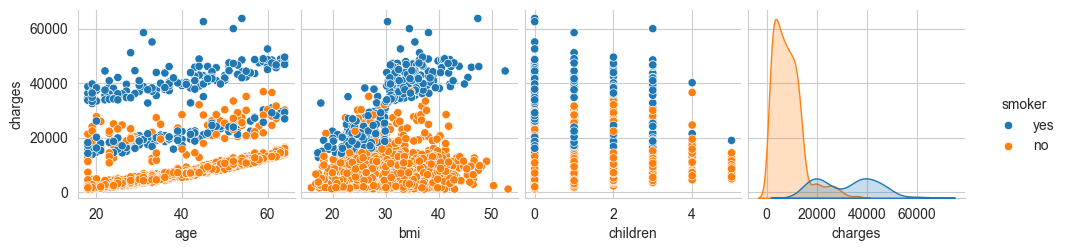

In [131]:
sns.pairplot(
	insurance,
	y_vars='charges',
	hue='smoker'
);

### Training ohne Feature Engineering

In [132]:
X = insurance.select_dtypes('number').drop(columns='charges')
y = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [133]:
raw_model = LinearRegression()
raw_model.fit(X_train, y_train)
raw_model.score(X_test, y_test)

0.12733318587824705

### Encoding

In [134]:
# Geschlechtsspalte codieren:
sex_encoded = pd.get_dummies(insurance['sex'], drop_first=True)
sex_encoded

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [135]:
insurance.insert(2, 'sex_encoded', sex_encoded)

In [136]:
insurance.head()

,age,sex,sex_encoded,bmi,children,smoker,region,charges
0,19,female,False,27.900,0,yes,southwest,16884.92400
1,18,male,True,33.770,1,no,southeast,1725.55230
2,28,male,True,33.000,3,no,southeast,4449.46200
3,33,male,True,22.705,0,no,northwest,21984.47061
4,32,male,True,28.880,0,no,northwest,3866.85520


In [137]:
def encode_categorical(col: pd.Series) -> pd.DataFrame:
	return pd.get_dummies(col, drop_first=True)

In [138]:
smoker_encoded = encode_categorical(insurance['smoker'])
smoker_encoded

,yes
0,True
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [139]:
insurance.insert(6, 'smoker_encoded', smoker_encoded)

In [140]:
insurance.head()

,age,sex,sex_encoded,bmi,children,smoker,smoker_encoded,region,charges
0,19,female,False,27.900,0,yes,True,southwest,16884.92400
1,18,male,True,33.770,1,no,False,southeast,1725.55230
2,28,male,True,33.000,3,no,False,southeast,4449.46200
3,33,male,True,22.705,0,no,False,northwest,21984.47061
4,32,male,True,28.880,0,no,False,northwest,3866.85520


In [141]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [142]:
regions_encoded = encode_categorical(insurance['region'])
regions_encoded

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [143]:
insurance = pd.concat([insurance, regions_encoded], axis=1)
insurance

,age,sex,sex_encoded,bmi,children,smoker,smoker_encoded,region,charges,northwest,southeast,southwest
0,19,female,False,27.900,0,yes,True,southwest,16884.92400,False,False,True
1,18,male,True,33.770,1,no,False,southeast,1725.55230,False,True,False
2,28,male,True,33.000,3,no,False,southeast,4449.46200,False,True,False
3,33,male,True,22.705,0,no,False,northwest,21984.47061,True,False,False
4,32,male,True,28.880,0,no,False,northwest,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,True,30.970,3,no,False,northwest,10600.54830,True,False,False
1334,18,female,False,31.920,0,no,False,northeast,2205.98080,False,False,False
1335,18,female,False,36.850,0,no,False,southeast,1629.83350,False,True,False
1336,21,female,False,25.800,0,no,False,southwest,2007.94500,False,False,True


In [144]:
insurance_numeric = insurance.select_dtypes(['number', 'bool'])
insurance_numeric.head()

,age,sex_encoded,bmi,children,smoker_encoded,charges,northwest,southeast,southwest
0,19,False,27.900,0,True,16884.92400,False,False,True
1,18,True,33.770,1,False,1725.55230,False,True,False
2,28,True,33.000,3,False,4449.46200,False,True,False
3,33,True,22.705,0,False,21984.47061,True,False,False
4,32,True,28.880,0,False,3866.85520,True,False,False


In [145]:
insurance_numeric['children'].unique()

array([0, 1, 3, 2, 5, 4])

### Skalierung

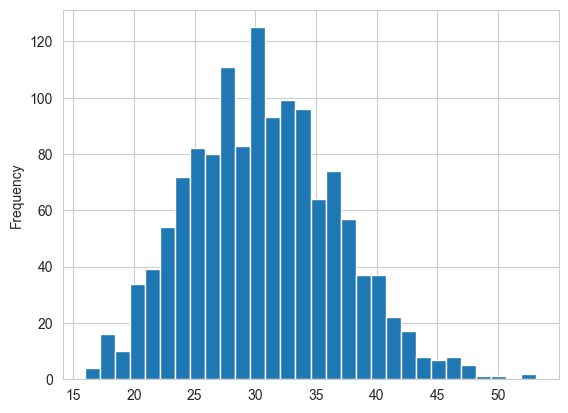

In [146]:
# Bei Normalverteilung ideal: Standardscaler
insurance_numeric['bmi'].plot(kind='hist', bins=30);

In [147]:
# Achtung, skaliert werden Train und Test separat!

In [148]:
X = insurance_numeric.drop(columns='charges')
y = insurance_numeric['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [149]:
std_scaler = StandardScaler()
X_train[['bmi']] = std_scaler.fit_transform(X_train[['bmi']])

In [150]:
X_train.head()

,age,sex_encoded,bmi,children,smoker_encoded,northwest,southeast,southwest
693,24,True,-1.140875,0,False,True,False,False
1297,28,False,-0.665842,2,False,False,True,False
634,51,True,1.528794,1,False,False,False,True
1022,47,True,0.926476,1,True,False,True,False
178,46,False,-0.268178,2,False,False,False,True


In [151]:
X_test['bmi'] = std_scaler.transform(X_test[['bmi']])

In [152]:
# Anlauf zu einem Modell nach etwas Feature Engineering:
fe_model = LinearRegression()
fe_model.fit(X_train, y_train)
fe_model.score(X_test, y_test)

0.7672642952734356